In [1]:

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import torch
import numpy as np
import pandas as pd
from torch import tensor

In [3]:
train_df=pd.read_csv("/content/gdrive/MyDrive/Dataset/adult_train.csv")
test_df=pd.read_csv("/content/gdrive/MyDrive/Dataset/adult_test.csv")

In [4]:
train_df.head()

,age,fnlwgt,educational-num,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log_capital_gain,log_capital_loss,Private_Workclass,education_label,marital_label,white_collar_label,gender_male,native_country_label,high_income
0,81,36147,15,0,1,1,10605,0,2,38,50,9.269175,0.0,1,0,1,0,1,1,0
1,46,525848,7,0,1,1,0,0,48,38,50,0.000000,0.0,0,0,1,0,1,1,1
2,39,77516,13,1,1,1,2174,0,40,38,50,7.684784,0.0,0,1,0,1,1,1,1
3,39,179137,9,1,1,0,0,0,40,38,50,0.000000,0.0,1,0,0,1,0,1,1
4,46,215943,9,4,1,0,0,0,40,38,50,0.000000,0.0,1,0,0,1,0,1,1


In [5]:
train_df.isnull().sum()

age                     0
fnlwgt                  0
educational-num         0
relationship            0
race                    0
gender                  0
capital-gain            0
capital-loss            0
hours-per-week          0
native-country          0
income                  0
log_capital_gain        0
log_capital_loss        0
Private_Workclass       0
education_label         0
marital_label           0
white_collar_label      0
gender_male             0
native_country_label    0
high_income             0
dtype: int64

In [6]:
train_feature_x=train_df[train_df.columns[: -1]].astype(float)
train_features=tensor(train_feature_x.values,dtype=torch.float)
train_label=tensor(train_df.high_income,dtype=torch.int)

In [7]:
max_value,_=train_features.max(dim=0)
train_features/=max_value
train_features

tensor([[0.9000, 0.0243, 0.9375,  ..., 0.0000, 1.0000, 1.0000],
        [0.5111, 0.3528, 0.4375,  ..., 0.0000, 1.0000, 1.0000],
        [0.4333, 0.0520, 0.8125,  ..., 1.0000, 1.0000, 1.0000],
        ...,
        [0.3333, 0.1942, 0.8125,  ..., 1.0000, 0.0000, 1.0000],
        [0.4333, 0.2024, 0.6250,  ..., 1.0000, 0.0000, 1.0000],
        [0.2444, 0.1642, 0.4375,  ..., 0.0000, 0.0000, 1.0000]])

In [8]:
test_feature_x = test_df[test_df.columns[:-1]].astype(float)
test_features = tensor(test_feature_x.values, dtype=torch.float)
test_label = tensor(test_df.high_income, dtype=torch.int)



In [9]:
max_value, _ = test_features.max(dim=0)
test_features /= max_value
test_features

tensor([[0.3444, 0.3083, 0.6250,  ..., 0.0000, 1.0000, 0.0000],
        [0.2111, 0.1558, 0.6250,  ..., 0.0000, 0.0000, 1.0000],
        [0.2333, 0.1217, 0.5625,  ..., 0.0000, 1.0000, 1.0000],
        ...,
        [0.3000, 0.1743, 0.1250,  ..., 0.0000, 1.0000, 0.0000],
        [0.5000, 0.1493, 0.4375,  ..., 0.0000, 1.0000, 1.0000],
        [0.7889, 0.1397, 0.6250,  ..., 1.0000, 1.0000, 1.0000]])

In [10]:
def init_weights():
  torch.manual_seed(42)
  number_parameter=train_features.shape[1]
  weights=torch.rand(number_parameter)
  return weights.requires_grad_()

In [11]:
def calculate_prediction(weights,features):
  multi=(features*weights)
  prediction=multi.sum(axis=1)
  return prediction

In [12]:
def calculate_loss(prediction,label):
  return torch.abs(prediction-label).mean()

In [13]:
def update_weight(weights,lr):
  weights.sub_(weights.grad*lr)
  return

In [14]:
def one_epoch(epoch_no, weights, lr):
  preds = calculate_prediction(weights,train_features)
  loss = calculate_loss(preds, train_label)
  loss.backward()
  with torch.no_grad(): update_weight(weights, lr)
  print(f"Epoch {epoch_no+1} => Loss: {loss}")

In [15]:
def train_model(epochs, lr):
  weights = init_weights()
  for epoch_no in range(epochs):
    one_epoch(epoch_no, weights, lr)
  return weights

In [16]:
weights = train_model(epochs=15, lr=0.01)

Epoch 1 => Loss: 4.401118278503418
Epoch 2 => Loss: 4.337820053100586
Epoch 3 => Loss: 4.2112226486206055
Epoch 4 => Loss: 4.021326065063477
Epoch 5 => Loss: 3.768131971359253
Epoch 6 => Loss: 3.45163893699646
Epoch 7 => Loss: 3.0718469619750977
Epoch 8 => Loss: 2.628756284713745
Epoch 9 => Loss: 2.122382640838623
Epoch 10 => Loss: 1.5549633502960205
Epoch 11 => Loss: 0.9629470705986023
Epoch 12 => Loss: 0.6690229773521423
Epoch 13 => Loss: 0.8212868571281433
Epoch 14 => Loss: 1.225162148475647
Epoch 15 => Loss: 1.7557687759399414


In [17]:
torch.save(weights, "linear_model_weights.pt")

In [18]:
test_preds = calculate_prediction(weights, test_features)
test_preds[:5]

tensor([-0.6887, -1.9811, -1.4544, -1.9354, -1.5654], grad_fn=<SliceBackward0>)

In [19]:
results = test_label == (test_preds > 0.5).int()
results[:5]

tensor([False, False, False, False, False])

In [20]:
results.float().mean()

tensor(0.2398)

In [21]:
def accuracy(weights,features):
  prediction=calculate_prediction(weights,features)
  result=test_label==(prediction>0.5).int()
  return result.float().mean()

In [22]:
trained_weights = torch.load("/content/linear_model_weights.pt")

In [23]:
accuracy(trained_weights, test_features)

tensor(0.2398)

# Introducing Sigmoid

**Sigmoid stands for $\sigma = \frac{1}{1+e^{-x}}$**



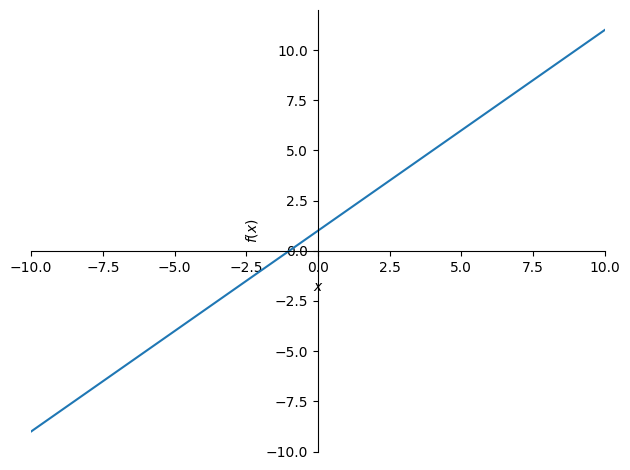

In [24]:
import sympy # symbolic python
sympy.plot("x+1", xlim=(-10,10))

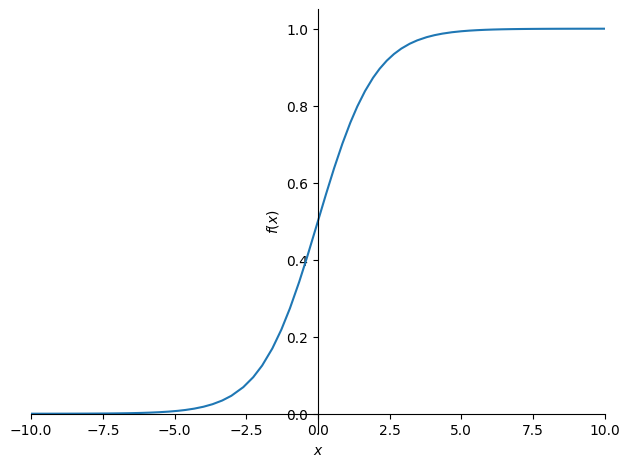

In [25]:
import sympy # symbolic python
sympy.plot("1/(1+exp(-x))", xlim=(-10,10))

# Using Sigmoid to retrain the model

In [26]:
def calculate_prediction(weights, features):
  mults = features @ weights # @ means matrix multiplication
  preds = torch.sigmoid(mults)
  return preds

In [27]:
def init_weights():
  torch.manual_seed(42)
  n_params = train_features.shape[1]
  weights = torch.rand(n_params)
  return weights.requires_grad_()

In [28]:
def calculate_loss(preds, labels):
  return torch.abs(preds-labels).mean()

In [29]:
def update_weights(weights, lr):
  weights.sub_(weights.grad * lr)
  return

In [30]:
def one_epoch(epoch_no, weights, lr):
  preds = calculate_prediction(weights, train_features)
  loss = calculate_loss(preds, train_label)
  loss.backward()
  with torch.no_grad(): update_weights(weights, lr)
  print(f"Epoch {epoch_no+1} => Loss: {loss}")

In [31]:
def train_model(epochs, lr):
  weights = init_weights()
  for epoch_no in range(epochs):
    one_epoch(epoch_no, weights, lr)
  return weights

In [32]:
weights = train_model(epochs=15, lr=2)

Epoch 1 => Loss: 0.24599476158618927
Epoch 2 => Loss: 0.24555248022079468
Epoch 3 => Loss: 0.2447742372751236
Epoch 4 => Loss: 0.24382245540618896
Epoch 5 => Loss: 0.24285228550434113
Epoch 6 => Loss: 0.2419712096452713
Epoch 7 => Loss: 0.24123184382915497
Epoch 8 => Loss: 0.2406444549560547
Epoch 9 => Loss: 0.24019527435302734
Epoch 10 => Loss: 0.23986051976680756
Epoch 11 => Loss: 0.239615336060524
Epoch 12 => Loss: 0.2394377738237381
Epoch 13 => Loss: 0.23930998146533966
Epoch 14 => Loss: 0.2392183542251587
Epoch 15 => Loss: 0.239152729511261


In [33]:
torch.save(weights, "sigmoid_model_weights.pt")

In [34]:
test_preds = calculate_prediction(weights, test_features)
test_preds[:10]

tensor([0.9999, 0.9996, 0.9998, 0.9999, 0.9999, 1.0000, 0.9991, 0.9999, 0.9998,
        1.0000], grad_fn=<SliceBackward0>)

In [35]:
def accuracy(weights, features):
  preds = calculate_prediction(weights, features)
  results = test_label == (preds > 0.5).int()
  return results.float().mean()

In [36]:
accuracy(weights, test_features)

tensor(0.7611)